In [41]:
#imports

import os
import pandas as pd

## Translated Data

In [42]:
#load data without titels and add titels
df = pd.read_csv('merged_CH_de_Fragen_en-GB.csv', header=None)
df.columns = ['internal ID', 'Frage_de-CH', 'Dialekt', 'Frage_en-GB']

In [43]:
# sort by internal ID
df = df.sort_values(by=['internal ID'])
df.head(10)

,internal ID,Frage_de-CH,Dialekt,Frage_en-GB
382,0,List alli Bretspiil vo GMT uf.,Zentralschweiz,Lists all board games of GMT.
372,1,Wer het Skype entwickled?,Zentralschweiz,Who developed Skype?
373,2,Welli Persine sind in Heraklion gboore?,Zentralschweiz,Which Persians were born in Heraklion?
581,2,Welli Persone sind in Herakolin gebore worde?,Zentralschweiz,Who were born in Herakolin?
52,4,Wer isch dr Bürgermeister in New York?,Graubünden,Who's the Mayor of New York?
637,4,wer isch bürgermeister vu new york city?,Graubünden,Who's Mayor of New York City?
630,4,Wär isch de Bürgermeister vo new york city?,Zentralschweiz,Who's the Mayor of New York City?
586,4,Wer isch de Bürgermeister von New York City?,Zentralschweiz,Who's the Mayor of New York City?
217,5,In welna Ländr hät es Ort mit meh als zwei Höhla?,Graubünden,In which countries has a place with more than ...
246,5,in wellna länder gits ort mit me als zwei höhl...,Graubünden,in which countries are there places with more ...


## Original Data

In [44]:
skript_ordner_pfad = os.path.dirname(os.path.abspath('DataTranslated.ipynb'))
skript_ordner_pfad
target = os.path.join(skript_ordner_pfad, "../DataPrep/qald_9_plus_dbpedia_de.csv")

In [45]:
original = pd.read_csv(target, sep=';')
original

,ID,Language,Frage,Set,internal ID
0,1,de,Liste die Brettspiele von GMT auf.,train,0
1,2,de,Wer entwickelte Skype?,train,1
2,3,de,Welche Personen wurden in Heraklion geboren?,train,2
3,4,de,In welchem Bundesstaat liegt Area 51?,train,3
4,5,de,Wer ist der Bürgermeister von New York City?,train,4
...,...,...,...,...,...
553,14,de,"Zeige mir Wanderrouten im Grand Canyon, für di...",test,553
554,87,de,Welches Buch hat die meisten Seiten?,test,554
555,148,de,Welche ist die größte Stadt der USA?,test,555
556,43,de,Liste die Internetseiten von Unternehmen mit m...,test,556


In [46]:
# original English Data

skript_ordner_pfad = os.path.dirname(os.path.abspath('DataTranslated.ipynb'))
skript_ordner_pfad
target = os.path.join(skript_ordner_pfad, "../DataPrep/qald_9_plus_dbpedia_EN.csv")

original_EN = pd.read_csv(target, sep=';')
original_EN

,ID,Frage_original_EN,internal ID
0,1,List all boardgames by GMT.,0
1,2,Who developed Skype?,1
2,3,Which people were born in Heraklion?,2
3,4,In which U.S. state is Area 51 located?,3
4,5,Who is the mayor of New York City?,4
...,...,...,...
553,14,Show me hiking trails in the Grand Canyon wher...,553
554,87,Which book has the most pages?,554
555,148,What is the largest state in the United States?,555
556,43,Give me the websites of companies with more th...,556


## Merge ID and Set

In [47]:
# merge the two dataframes by the column "internalID"
merged = pd.merge(original, df, on="internal ID")

# Rename the columns
merged = merged.rename(columns={"Frage": "Frage_de-De"})

In [48]:
merged

,ID,Language,Frage_de-De,Set,internal ID,Frage_de-CH,Dialekt,Frage_en-GB
0,1,de,Liste die Brettspiele von GMT auf.,train,0,List alli Bretspiil vo GMT uf.,Zentralschweiz,Lists all board games of GMT.
1,2,de,Wer entwickelte Skype?,train,1,Wer het Skype entwickled?,Zentralschweiz,Who developed Skype?
2,3,de,Welche Personen wurden in Heraklion geboren?,train,2,Welli Persine sind in Heraklion gboore?,Zentralschweiz,Which Persians were born in Heraklion?
3,3,de,Welche Personen wurden in Heraklion geboren?,train,2,Welli Persone sind in Herakolin gebore worde?,Zentralschweiz,Who were born in Herakolin?
4,5,de,Wer ist der Bürgermeister von New York City?,train,4,Wer isch dr Bürgermeister in New York?,Graubünden,Who's the Mayor of New York?
...,...,...,...,...,...,...,...,...
770,87,de,Welches Buch hat die meisten Seiten?,test,554,Welle Buech het am meiste Siitene?,Zürich,Which book has the most pages?
771,148,de,Welche ist die größte Stadt der USA?,test,555,Welles isch die grössti Stadt in Amerika?,Zentralschweiz,Which is the biggest city in America?
772,43,de,Liste die Internetseiten von Unternehmen mit m...,test,556,Tuan alli Internetsiita vu Unternehma uflista ...,Graubünden,Do list all websites of companies with more th...
773,179,de,Wie hieße die drei Schiffe von Kolumbus?,test,557,Wia hend dia drei Schiff vum Kolumbus gheissa?,Graubünden,What are the names of Columbus's three ships?


In [49]:
merged = pd.merge(merged, original_EN, on="internal ID")
merged.drop(['ID_y','Language'], axis=1, inplace=True)

In [50]:
merged = merged.rename(columns={"ID_x": "ID"})

In [51]:
merged

,ID,Frage_de-De,Set,internal ID,Frage_de-CH,Dialekt,Frage_en-GB,Frage_original_EN
0,1,Liste die Brettspiele von GMT auf.,train,0,List alli Bretspiil vo GMT uf.,Zentralschweiz,Lists all board games of GMT.,List all boardgames by GMT.
1,2,Wer entwickelte Skype?,train,1,Wer het Skype entwickled?,Zentralschweiz,Who developed Skype?,Who developed Skype?
2,3,Welche Personen wurden in Heraklion geboren?,train,2,Welli Persine sind in Heraklion gboore?,Zentralschweiz,Which Persians were born in Heraklion?,Which people were born in Heraklion?
3,3,Welche Personen wurden in Heraklion geboren?,train,2,Welli Persone sind in Herakolin gebore worde?,Zentralschweiz,Who were born in Herakolin?,Which people were born in Heraklion?
4,5,Wer ist der Bürgermeister von New York City?,train,4,Wer isch dr Bürgermeister in New York?,Graubünden,Who's the Mayor of New York?,Who is the mayor of New York City?
...,...,...,...,...,...,...,...,...
770,87,Welches Buch hat die meisten Seiten?,test,554,Welle Buech het am meiste Siitene?,Zürich,Which book has the most pages?,Which book has the most pages?
771,148,Welche ist die größte Stadt der USA?,test,555,Welles isch die grössti Stadt in Amerika?,Zentralschweiz,Which is the biggest city in America?,What is the largest state in the United States?
772,43,Liste die Internetseiten von Unternehmen mit m...,test,556,Tuan alli Internetsiita vu Unternehma uflista ...,Graubünden,Do list all websites of companies with more th...,Give me the websites of companies with more th...
773,179,Wie hieße die drei Schiffe von Kolumbus?,test,557,Wia hend dia drei Schiff vum Kolumbus gheissa?,Graubünden,What are the names of Columbus's three ships?,What were the names of the three ships by Colu...


## Evaluation mit BLEU und NIST

In [65]:
#create new column called BLEU
merged['BLEU'] = ""
merged['NIST'] = ""
merged.head(2)

,ID,Frage_de-De,Set,internal ID,Frage_de-CH,Dialekt,Frage_en-GB,Frage_original_EN,BLEU,NIST
0,1,Liste die Brettspiele von GMT auf.,train,0,List alli Bretspiil vo GMT uf.,Zentralschweiz,Lists all board games of GMT.,List all boardgames by GMT.,,
1,2,Wer entwickelte Skype?,train,1,Wer het Skype entwickled?,Zentralschweiz,Who developed Skype?,Who developed Skype?,,


In [66]:
from nltk.translate import nist_score, bleu_score

In [71]:
translation = merged['Frage_en-GB'].iloc[0]
reference = merged['Frage_original_EN'].iloc[0]

In [81]:
for i in range (0, len(merged)):
    translation = merged['Frage_en-GB'].iloc[i]
    reference = merged['Frage_original_EN'].iloc[i]
    merged['BLEU'].iloc[i] = bleu_score.sentence_bleu([reference], translation)
    merged['NIST'].iloc[i] = nist_score.sentence_nist([reference], translation)

/var/folders/p3/w0lx7sbn5pd85k9cmydlynhc0000gn/T/ipykernel_65748/948229268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['BLEU'].iloc[i] = bleu_score.sentence_bleu([reference], translation)
/var/folders/p3/w0lx7sbn5pd85k9cmydlynhc0000gn/T/ipykernel_65748/948229268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['NIST'].iloc[i] = nist_score.sentence_nist([reference], translation)
/var/folders/p3/w0lx7sbn5pd85k9cmydlynhc0000gn/T/ipykernel_65748/948229268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

In [82]:
merged

,ID,Frage_de-De,Set,internal ID,Frage_de-CH,Dialekt,Frage_en-GB,Frage_original_EN,BLEU,NIST
0,1,Liste die Brettspiele von GMT auf.,train,0,List alli Bretspiil vo GMT uf.,Zentralschweiz,Lists all board games of GMT.,List all boardgames by GMT.,0.671683,4.050801
1,2,Wer entwickelte Skype?,train,1,Wer het Skype entwickled?,Zentralschweiz,Who developed Skype?,Who developed Skype?,1.0,4.369881
2,3,Welche Personen wurden in Heraklion geboren?,train,2,Welli Persine sind in Heraklion gboore?,Zentralschweiz,Which Persians were born in Heraklion?,Which people were born in Heraklion?,0.743596,4.125211
3,3,Welche Personen wurden in Heraklion geboren?,train,2,Welli Persone sind in Herakolin gebore worde?,Zentralschweiz,Who were born in Herakolin?,Which people were born in Heraklion?,0.55738,3.532214
4,5,Wer ist der Bürgermeister von New York City?,train,4,Wer isch dr Bürgermeister in New York?,Graubünden,Who's the Mayor of New York?,Who is the mayor of New York City?,0.622509,3.914315
...,...,...,...,...,...,...,...,...,...,...
770,87,Welches Buch hat die meisten Seiten?,test,554,Welle Buech het am meiste Siitene?,Zürich,Which book has the most pages?,Which book has the most pages?,1.0,4.947258
771,148,Welche ist die größte Stadt der USA?,test,555,Welles isch die grössti Stadt in Amerika?,Zentralschweiz,Which is the biggest city in America?,What is the largest state in the United States?,0.297512,2.542755
772,43,Liste die Internetseiten von Unternehmen mit m...,test,556,Tuan alli Internetsiita vu Unternehma uflista ...,Graubünden,Do list all websites of companies with more th...,Give me the websites of companies with more th...,0.828765,5.204266
773,179,Wie hieße die drei Schiffe von Kolumbus?,test,557,Wia hend dia drei Schiff vum Kolumbus gheissa?,Graubünden,What are the names of Columbus's three ships?,What were the names of the three ships by Colu...,0.728158,4.890582


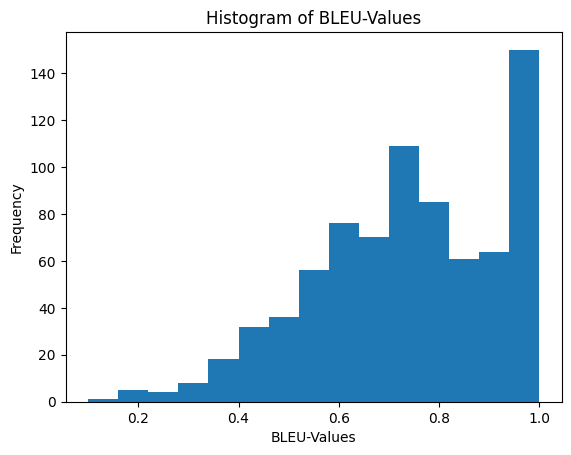

In [83]:
# histogram of BLEU values
import matplotlib.pyplot as plt
plt.hist(merged["BLEU"], bins=15)
plt.xlabel('BLEU-Values')
plt.ylabel('Frequency')
plt.title('Histogram of BLEU-Values')
plt.show()

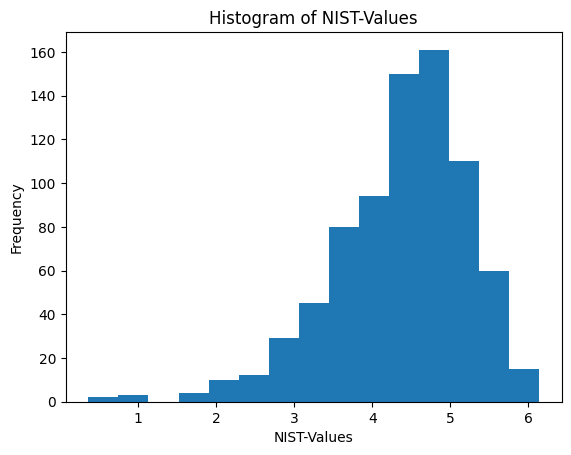

In [84]:
# histogram of NIST values
import matplotlib.pyplot as plt
plt.hist(merged["NIST"], bins=15)
plt.xlabel('NIST-Values')
plt.ylabel('Frequency')
plt.title('Histogram of NIST-Values')
plt.show()


In [80]:
# average BLEU value
print(f"BLEU: {merged['BLEU'].mean()}")
print(f"NIST: {merged['NIST'].mean()}")

BLEU: 0.7378436626989315
NIST: 4.370197976319512


In [88]:
# show all rows with an BLEU value lower than 0.5
merged.loc[merged['BLEU'] < 0.2]


,ID,Frage_de-De,Set,internal ID,Frage_de-CH,Dialekt,Frage_en-GB,Frage_original_EN,BLEU,NIST
65,42,Liste alle Schweizer NGOs auf.,train,41,List alli Schwiizer NGOs uf.,Zürich,Lists all Swiss NGOs.,Give me all Swiss non-profit organizations.,0.191169,0.447511
161,111,Wie viele Menschen arbeiten beim FDNY?,train,110,Wie viel Mensche schaffed bi FDNY?,Zürich,How many people work at FDNY?,What is the total amount of men and women serv...,0.0999,0.3585
319,234,Wie viele Einwohner hat Kairo?,train,232,Wie viel Iwohner hät Kairo?,Zürich,How many inhabitants does Cairo have?,What is the population of Cairo?,0.195258,2.615386


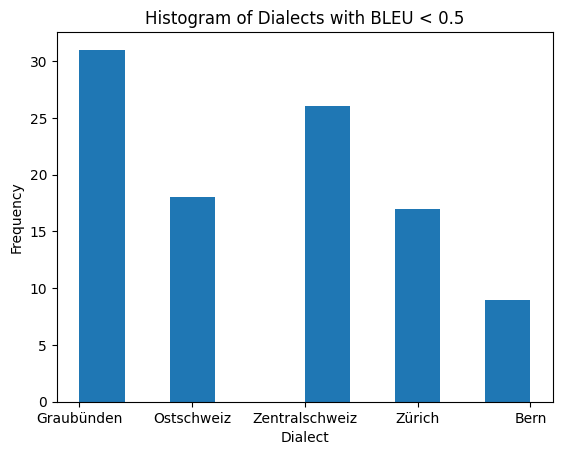

In [87]:
# Histogramm of dialects with bleu values < 0.5
import matplotlib.pyplot as plt
plt.hist(merged.loc[merged['BLEU'] < 0.5]['Dialekt'])
plt.xlabel('Dialect')
plt.ylabel('Frequency')
plt.title('Histogram of Dialects with BLEU < 0.5')
plt.show()
